In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('PlayerPersonalData.csv') 
print(df)

       Unnamed: 0  Unnamed: 0.1      ID               Name  Age  \
0               0             0   20801  Cristiano Ronaldo   32   
1               1             1  158023           L. Messi   30   
2               2             2  190871             Neymar   25   
3               3             3  176580          L. Suárez   30   
4               4             4  167495           M. Neuer   31   
...           ...           ...     ...                ...  ...   
17976       17976         17976  237463          A. Kelsey   17   
17977       17977         17977   11728      B. Richardson   47   
17978       17978         17978  231381           J. Young   17   
17979       17979         17979  238813       J. Lundstram   18   
17980       17980         17980  238308          L. Sackey   18   

                                                 Photo Nationality  \
0       https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1      https://cdn.sofifa.org/48/18/players/158023.png 

In [31]:
column_names=df.columns
column_data_types=df.dtypes 
print(column_names)
print(column_data_types)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Name', 'Age', 'Photo',
       'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo',
       'Value', 'Wage', 'Special'],
      dtype='object')
Unnamed: 0       int64
Unnamed: 0.1     int64
ID               int64
Name            object
Age              int64
Photo           object
Nationality     object
Flag            object
Overall          int64
Potential        int64
Club            object
Club Logo       object
Value           object
Wage            object
Special          int64
dtype: object


In [32]:
df_corr = df[['Age','Special', 'Overall']].corr() 
print(df_corr)

              Age   Special   Overall
Age      1.000000  0.238667  0.459765
Special  0.238667  1.000000  0.604092
Overall  0.459765  0.604092  1.000000


In [33]:
df_group=df.groupby('Club').max()['Age'] 
print(df_group)

Club
 SSV Jahn Regensburg      32
1. FC Heidenheim          31
1. FC Kaiserslautern      29
1. FC Köln                34
1. FC Magdeburg           34
                          ..
Águilas Doradas           39
Örebro SK                 33
Östersunds FK             34
İstanbul Başakşehir FK    36
Śląsk Wrocław             35
Name: Age, Length: 647, dtype: int64


<AxesSubplot:xlabel='Name', ylabel='Flag'>

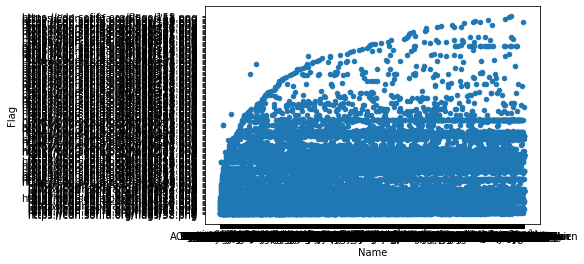

In [34]:
df_sub = df[['Name', 'Flag']] 
df_sub.plot.scatter(x='Name', y='Flag')

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Special', ylabel='Age'>,
        <AxesSubplot:xlabel='Overall', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Special'>,
        <AxesSubplot:xlabel='Special', ylabel='Special'>,
        <AxesSubplot:xlabel='Overall', ylabel='Special'>],
       [<AxesSubplot:xlabel='Age', ylabel='Overall'>,
        <AxesSubplot:xlabel='Special', ylabel='Overall'>,
        <AxesSubplot:xlabel='Overall', ylabel='Overall'>]], dtype=object)

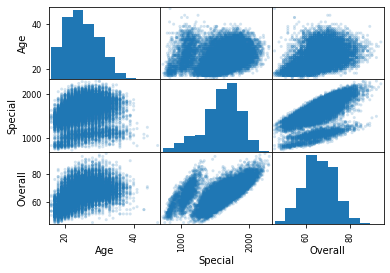

In [35]:
from pandas.plotting import scatter_matrix 
df_sub1 = df[['Age', 'Special', 'Overall']]
scatter_matrix(df_sub1,alpha=0.2)

In [36]:
df_missing=df.copy()
df_missing.loc[0,'Age']=np.nan
print(df_missing[df_missing['Age'].isnull()])

   Unnamed: 0  Unnamed: 0.1     ID               Name  Age  \
0           0             0  20801  Cristiano Ronaldo  NaN   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/48/18/players/20801.png    Portugal   

                                  Flag  Overall  Potential            Club  \
0  https://cdn.sofifa.org/flags/38.png       94         94  Real Madrid CF   

                                    Club Logo   Value   Wage  Special  
0  https://cdn.sofifa.org/24/18/teams/243.png  €95.5M  €565K     2228  


In [37]:
df.loc[df['Age']>=18,['Age','Name']].head()

,Age,Name
0,32,Cristiano Ronaldo
1,30,L. Messi
2,25,Neymar
3,30,L. Suárez
4,31,M. Neuer


In [38]:
df.rename(columns = {"Name": "The name of the players"}, inplace = True) 
df.head()

,Unnamed: 0,Unnamed: 0.1,ID,The name of the players,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493


In [39]:
new_dataset=df[['The name of the players','Age','Club']] 
new_dataset.head()

,The name of the players,Age,Club
0,Cristiano Ronaldo,32,Real Madrid CF
1,L. Messi,30,FC Barcelona
2,Neymar,25,Paris Saint-Germain
3,L. Suárez,30,FC Barcelona
4,M. Neuer,31,FC Bayern Munich


In [40]:
drop_df=df.drop(['Wage','Value'],axis=1) 
drop_df.head()

,Unnamed: 0,Unnamed: 0.1,ID,The name of the players,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,2228
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,2154
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,2100
3,3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,2291
4,4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,1493


In [41]:
#Percentage of missing values
rows, columns = df.shape
countcell = rows * columns
nullsnum = df.isnull().sum().sum()
missingpercentage = (nullsnum / countcell) * 100
print(f'Percentage of missing values: {missingpercentage}%')

Percentage of missing values: 0.09194890903360955%


In [42]:
#Checking rows which have less than 2 elements
rem = df.dropna(axis='index', thresh=2, inplace=False)
rows = df[~df.index.isin(rem.index)]
print(rows)

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, ID, The name of the players, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special]
Index: []


In [43]:
#Selection of numeric columns
numeric = df.select_dtypes(include=[np.number])
numeric_col = numeric.columns.values
print(numeric_col)

['Unnamed: 0' 'Unnamed: 0.1' 'ID' 'Age' 'Overall' 'Potential' 'Special']


In [44]:
#Selection of non-numeric columns
nonnumeric = df.select_dtypes(exclude=[np.number])
non_numeric_col = nonnumeric.columns.values
print(non_numeric_col)

['The name of the players' 'Photo' 'Nationality' 'Flag' 'Club' 'Club Logo'
 'Value' 'Wage']


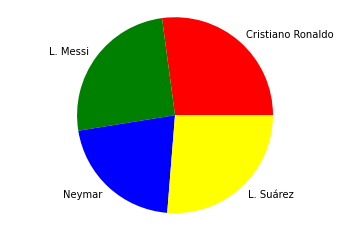

In [46]:
#Pie chart of football players with their age
labels = ['Cristiano Ronaldo','L. Messi','Neymar','L. Suárez']
values = [32,30,25,31]
colors = ['red','green','blue','yellow']
plt.pie(values,labels=labels,colors=colors)
plt.axis('equal')
plt.show()